In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

data = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")
price = data["Price"].values
day = data["Day"].values
date = pd.to_datetime(data["Date"])
chg = data["Chg%"].values


In [ ]:
mean_np = np.mean(price)
var_np = np.var(price)

print("Mean (NumPy):", mean_np)
print("Variance (NumPy):", var_np)


Mean (NumPy): 1560.6634538152612
Variance (NumPy): 58496.49239931613


In [ ]:
def my_mean(arr):
    s = 0
    for x in arr:
        s += x
    return s / len(arr)

def my_variance(arr):
    m = my_mean(arr)
    s = 0
    for x in arr:
        s += (x - m) ** 2
    return s / len(arr)

print("Mean (User-defined):", my_mean(price))
print("Variance (User-defined):", my_variance(price))


Mean (User-defined): 1560.6634538152598
Variance (User-defined): 58496.49239931618


In [ ]:
np_times = []
my_times = []

for _ in range(10):
    start = time.time()
    np.mean(price)
    np.var(price)
    np_times.append(time.time() - start)

    start = time.time()
    my_mean(price)
    my_variance(price)
    my_times.append(time.time() - start)

print("Average NumPy execution time:", sum(np_times)/10)
print("Average User-defined execution time:", sum(my_times)/10)


Average NumPy execution time: 5.340576171875e-05
Average User-defined execution time: 0.00015857219696044922


In [ ]:
wed_price = price[day == "Wed"]
mean_wed = np.mean(wed_price)

print("Wednesday Sample Mean:", mean_wed)
print("Population Mean:", mean_np)


Wednesday Sample Mean: 1550.7060000000001
Population Mean: 1560.6634538152612


In [ ]:
april_price = price[date.dt.month == 4]
mean_april = np.mean(april_price)

print("April Sample Mean:", mean_april)
print("Population Mean:", mean_np)


April Sample Mean: 1698.9526315789474
Population Mean: 1560.6634538152612


In [ ]:
loss_days = list(filter(lambda x: x < 0, chg))
prob_loss = len(loss_days) / len(chg)

print("Probability of making a loss:", prob_loss)


Probability of making a loss: 0.4979919678714859


In [ ]:
wed_chg = chg[day == "Wed"]
profit_wed = list(filter(lambda x: x > 0, wed_chg))

prob_profit_wed = len(profit_wed) / len(chg)
print("Probability of making profit on Wednesday:", prob_profit_wed)


Probability of making profit on Wednesday: 0.08433734939759036


In [ ]:
cond_prob = len(profit_wed) / len(wed_chg)
print("Conditional Probability of profit given Wednesday:", cond_prob)


Conditional Probability of profit given Wednesday: 0.42


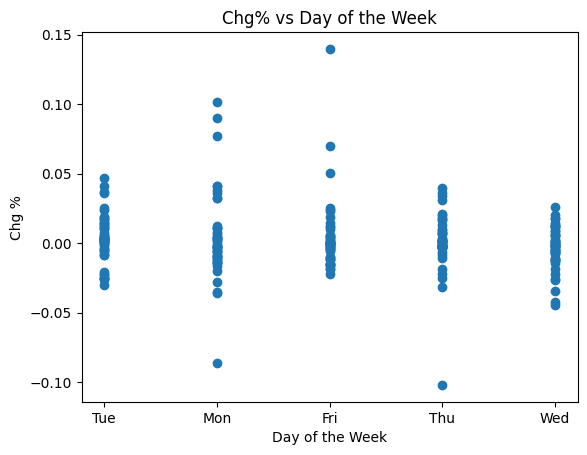

In [ ]:
plt.figure()
plt.scatter(day, chg)
plt.xlabel("Day of the Week")
plt.ylabel("Chg %")
plt.title("Chg% vs Day of the Week")
plt.show()
